Question to Victoria
 
I had to deviate from how preprocessing is done for NN training.

I didnt use your normalizer, (*or onehotencoder)


(1)when normalize, we should split first, and normalize each trainset, validation set, test set, and by batch individually. So we will normalize when we ingest the data into NN network. 

(*(2) When onehotencoding, y target is suggested to be 1D in NN network. )


(3) what are the params? Experiement values? This should be normalized within each column, per batch, per trainset


(4) what are the Label1 vs. Label2, what is ABCD?


In [ ]:
To DO 10/11/2020

Show prediction result  for one test sample, Plot with class label
Plot ROC, confusion matrix
How to archive a model file to deploy
continuously train and deploy-give article
Show tensorboard-how to monitor training live
Hyperparameter optimization
Reinforcement learning scheme
Organize transfer learning articles

# Python Environment Setup

In [408]:
%reset

In [102]:
!pwd #This is where you cloned to or where the distributed directory is located at. 

/Users/soyoungpark/Desktop/DAMADAY2020_NASA


In [103]:
!ls -lrt #You will see files, as following.

total 1083848
-rw-r--r--@ 1 soyoungpark  staff  110976485 Sep 24 10:48 ml_data_damaday.csv
-rw-r--r--@ 1 soyoungpark  staff  190712153 Sep 29 16:16 DataScienceUMDTalk_MOMAML_1505 (1).pptx
-rw-r--r--@ 1 soyoungpark  staff       1069 Oct  6 19:00 LICENSE
-rw-r--r--  1 soyoungpark  staff       2341 Oct  7 09:37 README.md
-rw-r--r--@ 1 soyoungpark  staff  111324662 Oct  7 13:05 SpectraInArrayInOneColumn.csv
-rw-r--r--@ 1 soyoungpark  staff  107698487 Oct  8 15:13 ml_data_damaday_final_VDP.csv
-rw-r--r--@ 1 soyoungpark  staff     145138 Oct  8 19:25 SoyoungEDALocal.ipynb
-rw-r--r--@ 1 soyoungpark  staff     128729 Oct  9 08:28 NotebookWorkshop_VDP.ipynb
-rw-r--r--  1 soyoungpark  staff       4852 Oct 10 17:07 requirement.txt
-rw-r--r--@ 1 soyoungpark  staff     565925 Oct 11 06:33 SoyoungAppendToVDP.ipynb


In [346]:
#!pip install -r requirement.txt #This is only needed when you initiate the python environment for the first time.

In [105]:
!echo $CONDA_DEFAULT_ENV #this is the name of your Conda Python Environment 

base


In [106]:
!which python #This python interpreter is what you will use for this notebook. 

/Users/soyoungpark/anaconda3/bin/python


# DAMA Day Workshop

## Welcome to this DAMA Day Workshop!
If you have any questions about this notebook, please contact us:
Victoria Da Poian (victoria.dapoian@nasa.gov)
Eric Lyness (eric.i.lyness@nasa.gov)

### In this notebook:
- Processing the Data
- Exploring the Data 
- Putting data in a ML format


Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for params (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

# Processing and Exploring the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [409]:
import pandas as pd
import os
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [410]:
###Load INPUT data File
file = 'ml_data_damaday_final_VDP.csv'
filename = file.split(".csv")[0]
dataset = pd.read_csv(file)  

In [411]:
###Info about input data File 
print(dataset.head())
print(dataset.shape)

# print(dataset.info())
# print(dataset.describe())
# print(dataset.dtypes())

         USID  0  1  2  3  4  5  6  7  8  ...  1950   Param1  Param2  \
0  8198000001  0  0  0  0  0  0  0  0  0  ...     0  12.6549       5   
1  8198000002  0  0  0  0  0  0  0  0  0  ...     0  12.2765       5   
2  8198000003  0  0  0  0  0  0  0  0  0  ...     0  12.7667       5   
3  8198000004  0  0  0  0  0  0  0  0  0  ...     0  12.4442       5   
4  8198000005  0  0  0  0  0  0  0  0  0  ...     0  13.1107       5   

     Param3  Param4  Param5  Param6  Param7  Label1  Label2  
0  0.463842       1    3812      83    0.01       A      10  
1  0.644139       1    2891      99    0.01       A      10  
2  0.417654       1    2720     102    0.01       A      10  
3  0.712478       1    1961      86    0.01       A      10  
4  0.566622       1    2652      98    0.01       A      10  

[5 rows x 1961 columns]
(26685, 1961)


### Analysis of the Columns (USID, Mass Spec, Params, Labels)

In [412]:
###Columns names
columns_names = dataset.columns.tolist()
listAllParams = columns_names[-9:-2]
print(listAllParams)
nberParams = len(listAllParams)

###Just the params part
dataset_params = dataset[listAllParams]
print(dataset_params)

['Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6', 'Param7']
        Param1  Param2    Param3  Param4  Param5  Param6     Param7
0      12.6549       5  0.463842       1    3812      83   0.010000
1      12.2765       5  0.644139       1    2891      99   0.010000
2      12.7667       5  0.417654       1    2720     102   0.010000
3      12.4442       5  0.712478       1    1961      86   0.010000
4      13.1107       5  0.566622       1    2652      98   0.010000
...        ...     ...       ...     ...     ...     ...        ...
26680  50.5495       1  0.000000       1     767      13  35.279999
26681  50.5172       1  0.000000       1     635      11  35.619999
26682  50.5172       1  0.000000       1     676      13  33.009998
26683  50.5495       1  0.000000       1     757      13  31.400000
26684  50.5172       1  0.000000       1     686      15  31.540001

[26685 rows x 7 columns]


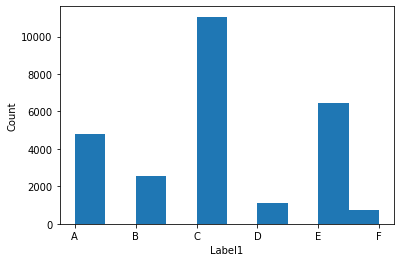

In [413]:
n, bins, patches = plt.hist(dataset.Label1)
plt.xlabel('Label1')
plt.ylabel('Count')
plt.show()

### Define your inputs X and Y

In [414]:
###Here you select the params you want to remove 
listParams = [] #no params to remove
#listParams = ["Param1", "Param2"] #if you want to remove Param1 and Param2

def getRawXy(dataset, listParams): #Soyoung put into a funtion to use for prediction later
    ###Y values (2 options for the labels)
    y_1 = dataset.Label1
    y_2 = dataset.Label2

    ###Define X values (all the dataset, only mass spec data, mass spec data + params)
    Xall = dataset.drop(['Label1','Label2'],axis=1) #all data
    XnoUSID = Xall.drop(['USID'],axis=1) #all data without USID
    XmassSpec = XnoUSID.drop(listAllParams, axis=1) #just mass spec data
    print("XmassSpec.shape",XmassSpec.shape)

    #Which input data X do you want to use?
    X = XnoUSID.drop([param for param in listParams], axis=1)
    inputSize = X.shape[1]

    #Which label y do you want to use?
    y=y_1
    nb_categories = len(pd.unique(y))
    print(nb_categories)

    print(X[:10])
    return X,y,XmassSpec, nb_categories

X,y, XmassSpec, nb_categories = getRawXy(dataset,listParams)

XmassSpec.shape (26685, 1951)
6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0

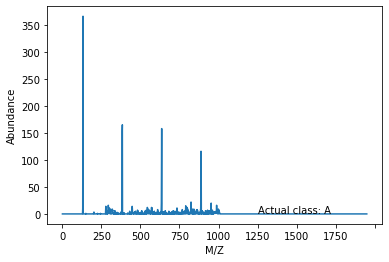

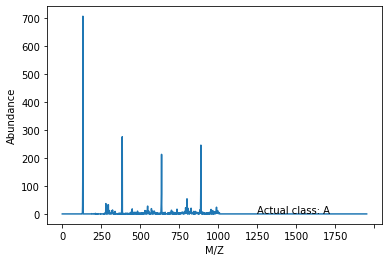

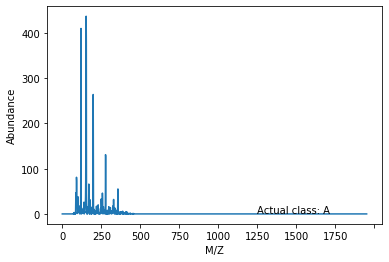

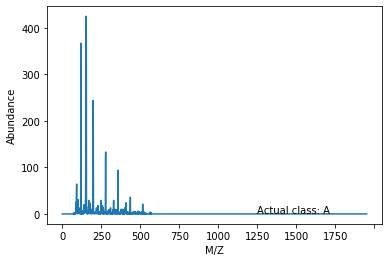

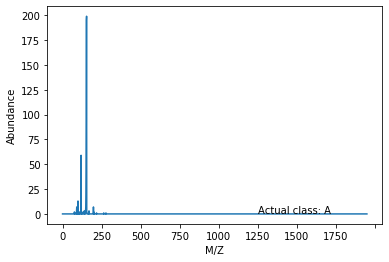

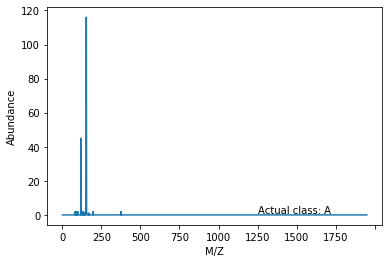

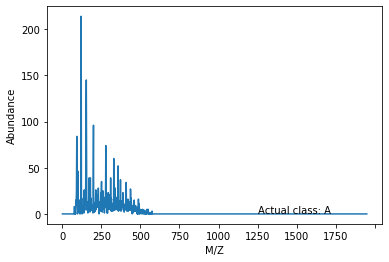

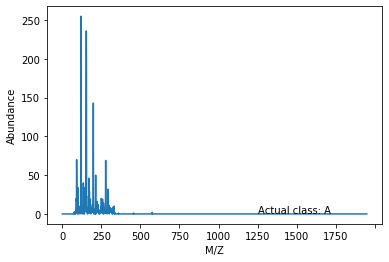

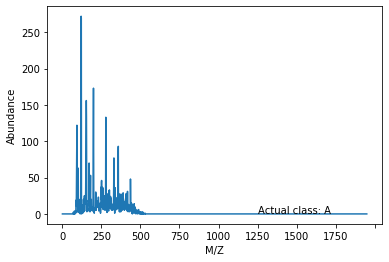

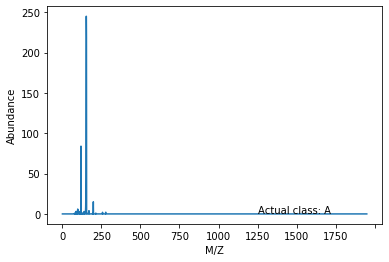

In [415]:
## Plot some mass specs
for i in range(1,100,10):
    massSpec = XmassSpec.iloc[i]
    plt.text(1250, 1, 'Actual class: {}'.format(str(y[i])))
    ax=massSpec.plot()
    ax.set_ylabel('Abundance')
    ax.set_xlabel('M/Z')
    plt.show()

### Encode the labels as integers

In [416]:
#Victoria's 6 column Y

def encoder(dataToEncode): #encode label values (label1 label2) as integer values
    #Soyoung add comment-Label
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    print("encoded_Y", encoded_Y.shape, encoded_Y[:2])
    classes = encoder.classes_
    # convert the vector of integers to dummy variables (i.e. one hot encoded) 
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = encoded_Y.reshape(len(encoded_Y), 1) #Soyoung commented out for 1DCNN training
    Y = onehot_encoder.fit_transform(integer_encoded)
    return(Y) #Soyoung changed from original Y(Onehotencoder) to encoded_Y(labelEncoder)

def printEncodertoLabels(dataToEncode, nb_categories): # print the relations between the class values and the encoded integers
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    for i in range(nb_categories):
        print(str(i) + " : " + encoder.inverse_transform([i]))

def dicEncodertoLabels(dataToEncode, nb_categories): # create a dictionary between the real labels and the encoded integers values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    arraytoLabelDico = {}
    for k in range(nb_categories):
        encoded_array = np.zeros(nb_categories)
        encoded_array[k] = 1
        inverted_label = encoder.inverse_transform([argmax(encoded_array)])
        arraytoLabelDico[tuple(encoded_array)] = str(inverted_label)
    return(arraytoLabelDico)
 
#Soyoung just put together to transform from raw ABCD y to onehotcoded 6 column Y
def getOneHotEncodedY(y, nb_categories):
    ###Encode class values as integers
    Y = encoder(y) #Note, Soyoung did not reshape y.
    print("Y", Y.shape)
    printEncodertoLabels(y, nb_categories)
    arraytoLabelDico = dicEncodertoLabels(y, nb_categories)
    print(arraytoLabelDico)
    #print("\nX: {} ; X(noUSID): {} ; y (initial): {} ; Y(encoded): {} ".format(X.shape, XnoUSID.shape, y.shape, Y.shape)) #Soyoung comment out
    print("\nX: {} ; y (initial): {} ; Y(encoded): {} ".format(X.shape,   y.shape, Y.shape))
    print("\nList of the different {} labels:\n {}  ".format(nb_categories, pd.unique(y)))
    return Y

#Soyoung to transform from raw ABCD y to 1 column integer classfication y
def getLabelEncodedy(y):
    encoder_l = LabelEncoder()
    encoded_y = encoder_l.fit_transform(y)
    print("encoded_y", encoded_y.shape, encoded_y[:2])    
    
    return encoded_y

Y=getOneHotEncodedY(y,nb_categories)

encoded_Y (26685,) [0 0]
Y (26685, 6)
['0 : A']
['1 : B']
['2 : C']
['3 : D']
['4 : E']
['5 : F']
{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0): "['A']", (0.0, 1.0, 0.0, 0.0, 0.0, 0.0): "['B']", (0.0, 0.0, 1.0, 0.0, 0.0, 0.0): "['C']", (0.0, 0.0, 0.0, 1.0, 0.0, 0.0): "['D']", (0.0, 0.0, 0.0, 0.0, 1.0, 0.0): "['E']", (0.0, 0.0, 0.0, 0.0, 0.0, 1.0): "['F']"}

X: (26685, 1958) ; y (initial): (26685,) ; Y(encoded): (26685, 6) 

List of the different 6 labels:
 ['A' 'B' 'C' 'D' 'E' 'F']  


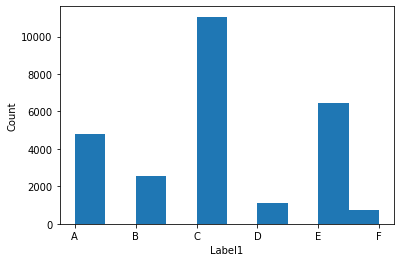

In [417]:
### check clasification distribution
n, bins, patches = plt.hist(y)
plt.xlabel('Label1')
plt.ylabel('Count')
plt.show()

### Victoria's Normalization Process

In [418]:
###Victoria's Normalization process
# def operationNormalizeX(x): #normalization process for our input data
#     return(x/(1+x))

# def normalizeX(X): #Soyoung comment-when normalize, we should split first, and normalize each trainset, validation set, test set individually.
#     # ###Min - Max scaler
#     # min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#     # X_scale = min_max_scaler.fit_transform(X)
#     # X_norm = pd.DataFrame(min_max_scaler.transform(X), index=X.index, columns=X.columns)

#     X = X.select_dtypes(exclude=['object']).apply(operationNormalizeX,axis=0)
#     print(X[:10])
#     return X

# X=normalizeX(X)


Now, we split the dataset into training, testing and validation sets.

In [419]:
###Split dataset
train_test_ratio = 0.2 #80% is used for the training
test_val_ratio = 0.5 #Half for validation, half for testing

#Soyoung split train vs val_test only    
# def splitTrainValTestset(X,y,train_test_ratio,test_val_ratio):

#     X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=train_test_ratio)
#     X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=test_val_ratio)
#     print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

#     return X_val, X_test, y_val, y_test

#X_val, X_test, y_val, y_test=splitTrainValTestset(X,y,train_test_ratio,test_val_ratio)



In [420]:

y[:2]

0    A
1    A
Name: Label1, dtype: object

In [421]:
# Put all pre-processing process into a single funtion
#Soyoung should not use normalized X, but currently normalized X coming in and gets splitted. 
def preprocess_dataset(dataset):
    X,y, XmassSpec,nb_categories = getRawXy(dataset,listParams)
    #Y=getOneHotEncodedY(y,nb_categories)
    #X=normalizeX(X) #when normalize, we should split first, and normalize each trainset, validation set, test set, and by batch individually. So we will normalize when we ingest the data into NN network. 

    #X_val, X_test, Y_val, Y_test=splitTrainValTestset(X,Y,train_test_ratio,test_val_ratio)
    y=getLabelEncodedy(y)
    
    #Y=encoder(y)
    #X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=train_test_ratio)
     
    X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=train_test_ratio)

    return X_train, X_val_and_test, Y_train, Y_val_and_test

X_train, X_val_and_test, Y_train, Y_val_and_test = preprocess_dataset(dataset)

XmassSpec.shape (26685, 1951)
6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0

In [422]:
# # Put all pre-processing process into a single funtion
# #Soyoung should not use normalized X, but currently normalized X coming in and gets splitted. 
# def OneHotEncoded_preprocess_dataset(dataset):
#     X,y, XmassSpec,nb_categories = getRawXy(dataset,listParams)
#     Y=getOneHotEncodedY(y,nb_categories)
   
#     X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, test_size=train_test_ratio)

#     return X_train, X_val_and_test, Y_train, Y_val_and_test

# X_train, X_val_and_test, Y_train, Y_val_and_test = OneHotEncoded_preprocess_dataset(dataset)

# Soyoung appends to Victoria's notebook

## Q1. Is there a better process than the unsupervised → supervised we are using?  

#### A1-1. Without manual feature engineering/dimentionlity reduction
Main reference: https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf


In [423]:
print(X_train.shape)
X_train.head(2)

(21348, 1958)


,0,1,2,3,4,5,6,7,8,9,...,1948,1949,1950,Param1,Param2,Param3,Param4,Param5,Param6,Param7
2264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,26.711599,5,0.457015,2,1767,47,0.01
19308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,19.229601,5,0.456813,1,4021,130,0.01


In [424]:
# print(y_train.shape)
# y_train[:2] #note it is not A,B,C, it is integer label encoded, 

## Try tensorflow 2DCNN sample codes first if you are entering to tensorflow/Deep learning for the first time.

https://www.datacamp.com/community/tutorials/cnn-tensorflow-python


https://www.tensorflow.org/guide/keras/sequential_model
https://www.tensorflow.org/tutorials/images/cnn

https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/


https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/



## Following approach is the simplest 1D CNN approach, by modifying the example 2DCNN codes from the references above. 

In [431]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

In [432]:
tf.__version__

'2.3.1'

### Getting Input Dimention right to ingest into 1D CNN model

In [436]:
print(Y_train.shape)
print(Y_train[:2]) #note it is 0,1,2,
to_categorical(Y_train).shape

(21348,)
[1 0]


(21348, 6)

In [449]:
#X_train: (21348, 1958)
#Y_train: (21348, )
n_spectrastep=X_train.shape[1]
num_sensors=1
output_classes=to_categorical(Y_train).shape[1]

def baseline_model(output_classes):
    #Simplest 1 layer 1DCNN
    model = models.Sequential()
    model.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model.add(Conv1D(filters=64, kernel_size=10, activation='relu')) #, input_shape=(n_spectrastep,num_sensors)
    model.add(Conv1D(filters=64, kernel_size=10, activation='relu'))  
    model.add(Flatten())
    model.add(Dense(100, input_dim=4, activation='relu'))
    model.add(Dense(10, input_dim=4, activation='relu'))
    model.add(Dense(output_classes,  activation='softmax'))
    model.summary()
    return model

model=baseline_model(output_classes)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_41 (Reshape)         (None, 1958, 1)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 1949, 64)          704       
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1940, 64)          41024     
_________________________________________________________________
flatten_2 (Flatten)          (None, 124160)            0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               12416100  
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_63 (Dense)             (None, 6)               

In [451]:
BATCH_SIZE=32
SEED=42
callbacks_list = [ModelCheckpoint(filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True),
                  EarlyStopping(monitor='acc', patience=1)
]

filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

##################
#[1] Onetime fit
##################
#Shapes (None, 6) and (None, 1958, 6) are incompatible
# def fit(model, EPOCHS):
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train, Y_train, \
#                     epochs=EPOCHS, 
#                     batch_size=BATCH_SIZE,
#                     validation_split=0.2,
#                     shuffle=True,
#                     callbacks=[checkpointer])
#     return history

# history=fit(model, EPOCHS=1)  
#####################

##################
#[2] Cross validation
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# ##################
# estimator = KerasClassifier(build_fn=baseline_model, \
#                             epochs=1, batch_size=BATCH_SIZE, verbose=1)

# kfold = KFold(n_splits=3, shuffle=True, random_state=SEED)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# ##################



#https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([X_train], batch_size=BATCH_SIZE, y=to_categorical(Y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=1, callbacks=[checkpointer])

501/501 [==============================] - 135s 270ms/step - loss: 0.8819 - accuracy: 0.7420 - val_loss: 0.4242 - val_accuracy: 0.8769


### Plot how model learns  over training.  

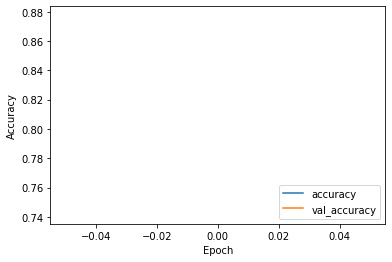

In [452]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
     
plot_history(history)

## Learning is not happening! Let's improve accuracy by (1) improving network architecture and (2) Hyperparameter optimization

#### (1) Improve network architecture

534/534 [==============================] - 11s 21ms/step - loss: 7.3915 - accuracy: 0.1781 - val_loss: 7.3894 - val_accuracy: 0.1796


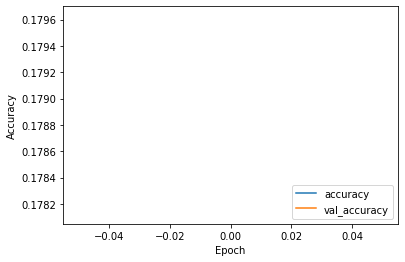

In [329]:
#Add some higher order to 1DCNN

def build_improved_model():
    model= models.Sequential()
    model.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) #
    model.add(Dropout(0.5))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    #https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/
    model.add(Dense(1, activation='softmax')) #multi-class classification problem, the softmax activation function is often used on the output layer and the likelihood of the observation for each class is returned as a vector.

    model.summary()
    return model

 
history=fit(model, EPOCHS=1) #Check if model runs or not with EPOCHS=1 first, then, increase EPOCHS.
plot_history(history)

#### (2) Optimize Hyperparameters

## Predict the class for a test spectra

In [334]:
y_val_and_test

array([2, 2, 4, ..., 2, 1, 3])

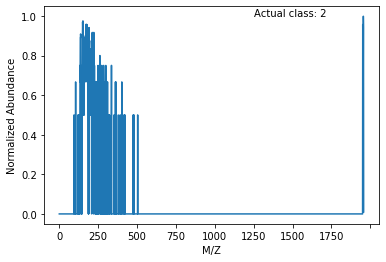

In [336]:
#plot a test spectra with Actual Label/Predicted label
sampleN=4
ax=X_test.iloc[sampleN].plot()
ax.set_ylabel('Normalized Abundance')
ax.set_xlabel('M/Z')
plt.text(1250, 1, 'Actual class: {}'.format(str(y_val_and_test[sampleN]))) #x=1250, y=1, 
#plt.text(1250, 0.9, 'Predicted class: {}'.format(str(y_pred_test))) #x=1250, y=1, 
plt.show() 

In [338]:
print(X_test.iloc[sampleN].shape)
reshaped_Xtest=np.array(X_test.iloc[sampleN]).reshape((-1, len(X_test.iloc[sampleN])))
print(reshaped_Xtest.shape) 

#total size of new array must be unchanged, input_shape = [1], output_shape = [1958, 1]

y_pred_test = model.predict(reshaped_Xtest)
print("y_pred_test", y_pred_test.shape,y_pred_test)

(1958,)
(1, 1958)
y_pred_test (1, 1956, 1) [[[2.3227334e-02]
  [2.3227334e-02]
  [2.3227334e-02]
  ...
  [2.0019622e-08]
  [7.8700525e-11]
  [1.4422151e-08]]]


### Plot ROC, Confution matrix

### How to archive a model to deploy to Mars

## Q2. How can we make more data? Transfer learning is still a big question mark, how is it implementable? What is the best way?  

#### A2-1: Augment data with simulation generating mass spectra. 

http://physics.bu.edu/~duffy/HTML5/mass_spectrometer.html

#### A2-2. Domain specofic

https://venturebeat.com/2020/10/08/the-secrets-of-small-data-how-machine-learning-finally-reached-the-enterprise/amp/

https://www.youtube.com/watch?v=vbhEnEbj3JM


## Q3. How do we avoid missing the anomaly that contains the Nobel prize? (--> trusting AI theme)

## Q4. Realtime automated determination in the rover?